# Multiple Qubits and Entangled States

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, BasicAer
from qiskit.visualization import plot_bloch_multivector, plot_histogram

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

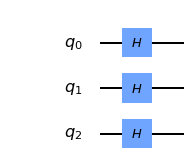

In [2]:
qc = QuantumCircuit(3)

# apply Hadamard
for q in range(3):
    qc.h(q)
qc.draw(output='mpl')

At this point each state that the qubit can have is equally probable.

In [3]:
backend = Aer.get_backend('statevector_simulator')
res  = execute(qc, backend=backend).result()
final_state = res.get_statevector()

print (final_state)
print (1./np.sqrt(8))

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]
0.35355339059327373


we can represent the simultaneous operations (H & X) using their tensor product:

$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

The operation looks like this:

$$
X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\ 
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
$$

Which we can then apply to our 4D statevector $|q_1 q_0\rangle$. This can become quite messy, you will often see the clearer notation:

$$
X\otimes H = 
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$

Instead of calculating this by hand, we can use Qiskit’s `unitary_simulator` to calculate this for us. The unitary simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit:

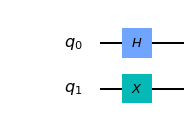

In [4]:
𝑋=[[0, 1] ,[1, 0]]
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

In [5]:
backend = Aer.get_backend('unitary_simulator')
res  = execute(qc, backend=backend).result()
unitary = res.get_unitary()

print (unitary.round(2).real)


[[ 0.    0.    0.71  0.71]
 [ 0.    0.    0.71 -0.71]
 [ 0.71  0.71  0.    0.  ]
 [ 0.71 -0.71  0.    0.  ]]


### Problem 2.1

Calculate the single qubit unitary ( 𝑈 ) created by the squence of gates:  𝑈=𝑋𝑍𝐻 . Use Qiskit's unitary simulator to check your results.

Note: 
\begin{equation}
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \\
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\end{equation}


### Solution:
I checked the multiplication on the paper and most imp things to note is the order of multiplication. If you apply $Z$ first, then $H$ then $X$ then you multiply the matrices as $X \otimes H \otimes Z $

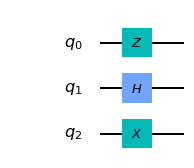

In [6]:
qc = QuantumCircuit(3)
qc.z(0)
qc.h(1)
qc.x(2)
qc.draw('mpl')

In [7]:
backend = Aer.get_backend('unitary_simulator')
res  = execute(qc, backend=backend).result()
unitary = res.get_unitary()

print (unitary.round(2).real)

[[ 0.    0.    0.    0.    0.71  0.    0.71  0.  ]
 [ 0.    0.    0.    0.    0.   -0.71  0.   -0.71]
 [ 0.    0.    0.    0.    0.71  0.   -0.71  0.  ]
 [ 0.    0.    0.    0.    0.   -0.71  0.    0.71]
 [ 0.71  0.    0.71  0.    0.    0.    0.    0.  ]
 [ 0.   -0.71  0.   -0.71  0.    0.    0.    0.  ]
 [ 0.71  0.   -0.71  0.    0.    0.    0.    0.  ]
 [ 0.   -0.71  0.    0.71  0.    0.    0.    0.  ]]


## Multi-Qubit Gates

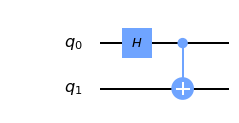

In [8]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

In [9]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
print (final_state.round(2))

[0.71+0.j 0.  +0.j 0.  +0.j 0.71+0.j]


$$ CNOT \vert 0+ \rangle =\frac{1}{\sqrt2}( \vert 00 \rangle + \vert 11 \rangle )$$

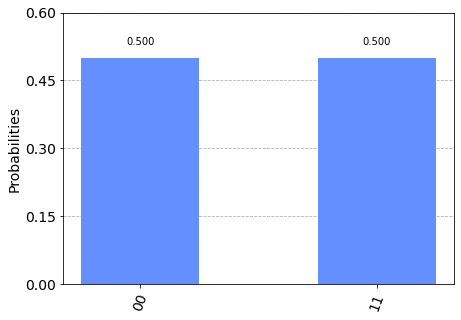

In [10]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

# Phase Kickback

We saw that we could entangle the two qubits by placing the control qubit in the state $|+\rangle$:

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

But what happens if we put the second qubit in superposition? 



In [11]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

We see we have the CNOT acting on the state:

$$ |{+}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$

Since the CNOT swaps the amplitudes of $|01\rangle$ and $|11\rangle$, we see no change:

In [12]:
backend_sv =Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend_sv).result().get_statevector()
print (final_state.round(2))

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


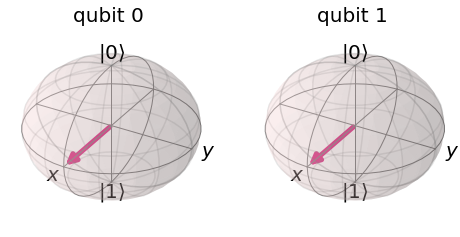

In [13]:
plot_bloch_multivector(final_state)

In [14]:
import qiskit
qiskit.__version__

'0.14.2'

In [15]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.z(1)
qc.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ H ├┤ Z ├
     └───┘└───┘

In [16]:
final_state = execute(qc,backend_sv).result().get_statevector()


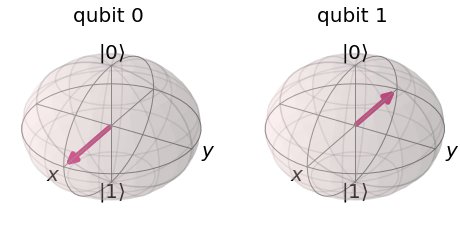

In [17]:
plot_bloch_multivector(final_state)

In [18]:
qc.cx(0,1)
qc.draw()

┌───┐          
q_0: ┤ H ├───────■──
     ├───┤┌───┐┌─┴─┐
q_1: ┤ H ├┤ Z ├┤ X ├
     └───┘└───┘└───┘

[ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]


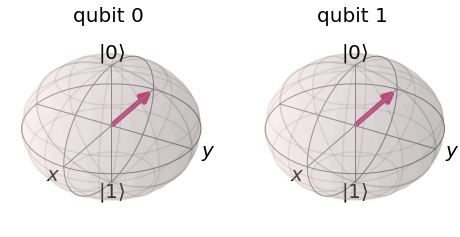

In [19]:
final_state = execute(qc,backend_sv).result().get_statevector()
print (final_state)
plot_bloch_multivector(final_state)


If you remember the H-gate transforms  |+⟩→|0⟩  and  |−⟩→|1⟩ , we can see that wrapping a CNOT in H-gates has the equivalent behaviour of a CNOT acting in the opposite direction:

In [20]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw())  
backend_uni = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend_uni).result().get_unitary()
print (unitary.round(2).real)
#array_to_latex(unitary, pretext="\\text{Circuit = }\n")

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

[[ 1.  0. -0.  0.]
 [ 0.  1.  0. -0.]
 [-0.  0.  0.  1.]
 [ 0. -0.  1. -0.]]


In [21]:
qc.cx(1,0)
display(qc.draw())  
backend_uni = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend_uni).result().get_unitary()
print (unitary.round(2).real)

┌───┐     ┌───┐┌───┐
q_0: ┤ H ├──■──┤ H ├┤ X ├
     ├───┤┌─┴─┐├───┤└─┬─┘
q_1: ┤ H ├┤ X ├┤ H ├──■──
     └───┘└───┘└───┘

[[ 1.  0. -0.  0.]
 [ 0.  1.  0. -0.]
 [ 0. -0.  1. -0.]
 [-0.  0.  0.  1.]]
